In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from scipy.signal import argrelextrema
from scipy.interpolate import UnivariateSpline
from statsmodels.nonparametric.smoothers_lowess import lowess

(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)


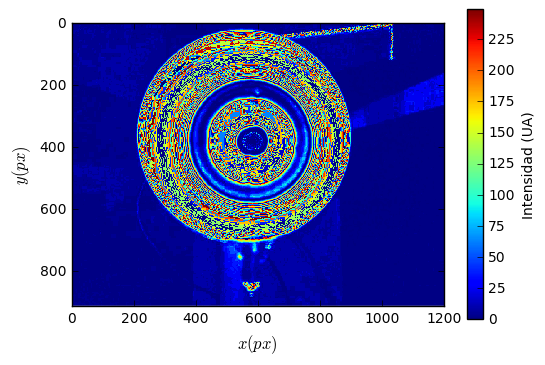

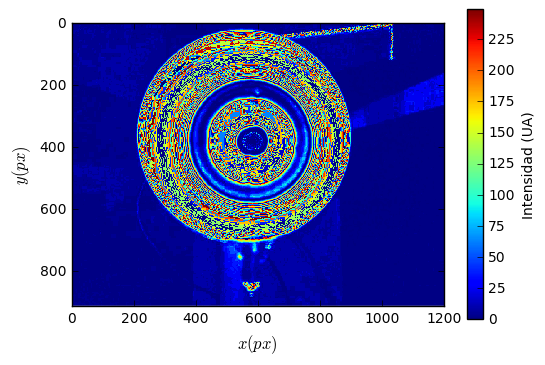

In [29]:
num_names_list = range(20, 52,2)
names_list = []
for i in num_names_list:
    names_list.append(str(i))

pics_list=[]
for s in names_list:
    img=mpimg.imread('exp_pics/'+s+'.jpg')
    pics_list.append(img)
    print np.shape(img)
    
#plt.imshow(pics_list[0][:, :, :])
plt.imshow((pics_list[15][:, :, 1])**2, interpolation='none')
plt.xlabel('$x(px)$', fontsize=12)
plt.ylabel('$y(px)$', fontsize=12)
plt.xlim(0, 1200)
plt.colorbar(label='Intensidad (UA)')
plt.gcf()
#plt.savefig('example_gchan.png',interpolation=False, dpi=300)

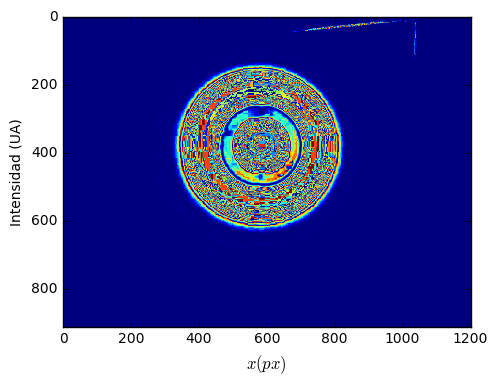

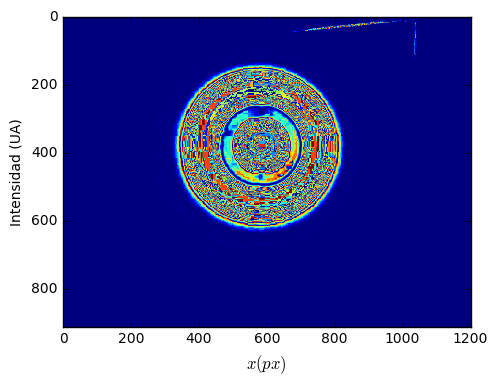

In [31]:
img=mpimg.imread('exp_pics/50_edit.jpg')
plt.imshow(img[:,:,1]**2)
#plt.plot(img[:,:,1][400, :])
#plt.plot(pics_list[10][400, :,1])
filtered = lowess(pics_list[10][400, :,1]**2, px_coords, is_sorted=True, frac=0.025, it=0)
#plt.plot(filtered[:,0], filtered[:,1])
plt.xlabel('$x(px)$', fontsize=12)
plt.ylabel('Intensidad (UA)')
plt.xlim(0, 1200)
plt.gcf()
#plt.savefig('example_slice.png', dpi=300)

0.0247
[   1    3    6   11   13   15   19   22   27   38   45   49   52   54   56
   71   73   75   77   79   82   87   98  101  113  115  117  119  122  124
  128  133  141  143  157  187  190  193  383  558  588  768 1156 1198]


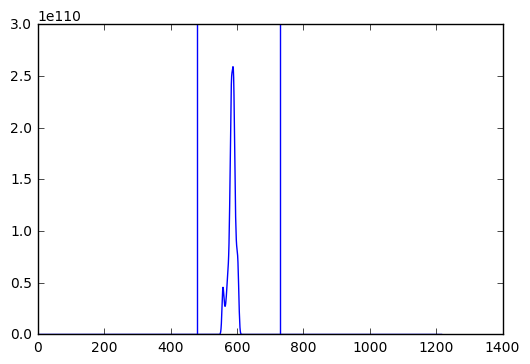

In [36]:
px_coords=np.arange(0, 1217)
init_px=207 #posicion arreglo
final_px=899
dist_px = final_px-init_px
def px_to_cm(d_px):
    global dist_px
    return d_px * 8.55/dist_px
print '%.4f'%px_to_cm(2)
filtered = lowess(pics_list[10][400, :,1], px_coords, is_sorted=True, frac=0.025, it=0)
plt.plot(filtered[:,0], np.exp(filtered[:,1]))
plt.axvline(481)
plt.axvline(730)
print argrelextrema(filtered[:,1], np.greater)[0]

In [5]:

D1 = np.array([px_to_cm(abs(411-725)),px_to_cm(abs(419-725)), px_to_cm(abs(418-724)),\
            px_to_cm(abs(430-723)), px_to_cm(abs(444-706)), px_to_cm(abs(440-710)),\
             px_to_cm(abs(453-698)),px_to_cm(abs(459-692)), px_to_cm(abs(457-694)),\
             px_to_cm(abs(465-687)), px_to_cm(abs(463-685)), px_to_cm(abs(471-683)),\
             px_to_cm(abs(476-682)), px_to_cm(abs(477-681)), px_to_cm(abs(478-681)), \
             px_to_cm(abs(481-680)) ])
D2 = np.array([px_to_cm(abs(827-334)),px_to_cm(abs(312-825)), px_to_cm(abs(314-813)), \
              px_to_cm(abs(323-809)), px_to_cm(abs(333-800)), px_to_cm(abs(345-796)),\
              px_to_cm(abs(355-789)), px_to_cm(abs(363-782)), px_to_cm(abs(371-776)), \
              px_to_cm(abs(375-775)), px_to_cm(abs(383-768)), px_to_cm(abs(384-764)), \
              px_to_cm(abs(393-760)), px_to_cm(abs(395-757)), px_to_cm(abs(398-756)), \
              px_to_cm(abs(403-753))])
Volt = 1e3*np.arange(2., 5.2, 0.2)
print Volt

[ 2000.  2200.  2400.  2600.  2800.  3000.  3200.  3400.  3600.  3800.
  4000.  4200.  4400.  4600.  4800.  5000.]


In [6]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress([(1./np.sqrt(Volt))[-1], (1./np.sqrt(Volt))[0]], [px_to_cm(70-13),px_to_cm(54-21) ][::-1])
D2_errors =  0.5*(slope*(1./np.sqrt(Volt))+intercept)*1e-2
D2_x_errors = ((0.05*1e3)/abs(Volt))*abs(1./(np.sqrt(Volt)))
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress([(1./np.sqrt(Volt))[-1], (1./np.sqrt(Volt))[0]], [px_to_cm(99-75),px_to_cm(70-52)][::-1])
D1_errors =  0.5*(slope1*(1./np.sqrt(Volt))+intercept1)*1e-2


/home/daniel/anaconda2/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:97: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


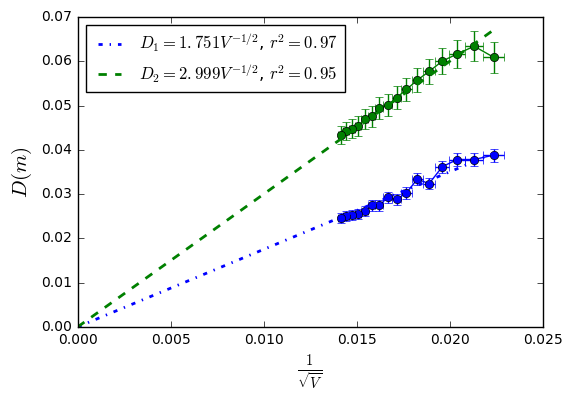

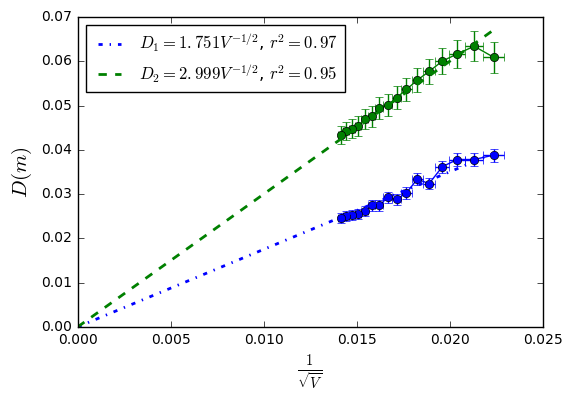

In [7]:
from scipy.optimize import curve_fit
plt.errorbar(1./np.sqrt(Volt), D1*1e-2, xerr=D2_x_errors, yerr = D1_errors, marker='o')
plt.errorbar(1./np.sqrt(Volt), D2*1e-2,xerr=D2_x_errors, yerr = D2_errors, marker='o')
def func(x, a):
    return a * x
x = np.linspace(0, 1./np.sqrt(2000), 100)
popt, pcov = curve_fit(func, 1./np.sqrt(Volt), D1*1e-2)
corr_d1 = np.corrcoef(D1, func(1./np.sqrt(Volt), *popt))[0,1]**2
perr = np.sqrt(np.diag(pcov))

plt.plot(x, func(x, *popt), label='$D_1=%.3f V^{-1/2}$, $r^2=%.2f$'%(popt[0],corr_d1),ls='-.', lw=2, c='b')
popt2, pcov2 = curve_fit(func, 1./np.sqrt(Volt), D2*1e-2)
corr_d2= np.corrcoef(D2, func(1./np.sqrt(Volt), *popt2))[0,1]**2
perr2 = np.sqrt(np.diag(pcov2))
plt.plot(x, func(x, *popt2), label='$D_2=%.3f V^{-1/2}$, $r^2=%.2f$'%(popt2[0], corr_d2), ls='--', lw=2, c='g')
plt.legend(loc=0, fontsize=12)
plt.xlabel('$\\frac{1}{\sqrt{V}}$', fontsize=15)
plt.ylabel('$D(m)$', fontsize=15)

plt.gcf()
#plt.savefig('diam_lines.svg', dpi=300, transparency=True)

In [8]:
print '$V (\pm 0.05kV)$ & $D_1 (cm)$ & $D_2 (cm)$\\\\\\hline' 
for i in range(len(D1)):
    print Volt[i]*1e-3, ' & %.4f'%D1[i],'$\pm$ %.4f'%D1_errors[i], '& %.4f'%D2[i],'$\pm$ %.4f'%D1_errors[i], '\\\\'

$V (\pm 0.05kV)$ & $D_1 (cm)$ & $D_2 (cm)$\\\hline
2.0  & 3.8796 $\pm$ 0.0015 & 6.0913 $\pm$ 0.0015 \\
2.2  & 3.7808 $\pm$ 0.0014 & 6.3384 $\pm$ 0.0014 \\
2.4  & 3.7808 $\pm$ 0.0014 & 6.1654 $\pm$ 0.0014 \\
2.6  & 3.6202 $\pm$ 0.0014 & 6.0048 $\pm$ 0.0014 \\
2.8  & 3.2371 $\pm$ 0.0013 & 5.7700 $\pm$ 0.0013 \\
3.0  & 3.3360 $\pm$ 0.0013 & 5.5723 $\pm$ 0.0013 \\
3.2  & 3.0271 $\pm$ 0.0013 & 5.3623 $\pm$ 0.0013 \\
3.4  & 2.8788 $\pm$ 0.0012 & 5.1770 $\pm$ 0.0012 \\
3.6  & 2.9283 $\pm$ 0.0012 & 5.0040 $\pm$ 0.0012 \\
3.8  & 2.7429 $\pm$ 0.0012 & 4.9422 $\pm$ 0.0012 \\
4.0  & 2.7429 $\pm$ 0.0012 & 4.7569 $\pm$ 0.0012 \\
4.2  & 2.6194 $\pm$ 0.0012 & 4.6951 $\pm$ 0.0012 \\
4.4  & 2.5452 $\pm$ 0.0012 & 4.5345 $\pm$ 0.0012 \\
4.6  & 2.5205 $\pm$ 0.0011 & 4.4727 $\pm$ 0.0011 \\
4.8  & 2.5082 $\pm$ 0.0011 & 4.4233 $\pm$ 0.0011 \\
5.0  & 2.4587 $\pm$ 0.0011 & 4.3244 $\pm$ 0.0011 \\


$$\lambda_{dB} = \frac{h}{\sqrt{2eVm_e}}$$


$$\lambda_{Bragg} = \frac{2d\sin\theta}{n}, \ \ \lambda < 2d_i$$


$$\lambda_{Bragg} = \frac{d}{n}\frac{D}{2L}$$

$$\frac{h}{\sqrt{2eVm_e}}=\frac{d}{n}\frac{D}{2L}$$

$$D=\frac{2nL}{d}\frac{h}{\sqrt{2eVm_e}}$$

$$D=\frac{2hnL}{d\sqrt{2em_e}}\frac{1}{\sqrt{V}}$$

$$M=\frac{2hnL}{d\sqrt{2em_e}}$$

$$d_i=\frac{2hnL}{M_i\sqrt{2em_e}}$$

$$n=1$$

$$d\sqrt{2eVm_e}\frac{D}{2L} = h$$

In [9]:
from scipy.constants import *
slope_constants= 2*h*13.5e-2/np.sqrt(2*e*m_e)
print popt[0], popt2[0]
d1=slope_constants/popt[0]
d2=(slope_constants)/popt2[0]
d1_teo = 213e-12
d2_teo = 123e-12
slope_1_teo=slope_constants/d1_teo
slope_2_teo=slope_constants/d2_teo
print slope_1_teo, '+-', perr[0]
print slope_2_teo, '+-', perr2[0]
print d1*1e12, '+-',d1*1e12*perr[0]/popt[0] , 'pm'
print d2*1e12, '+-',d2*1e12*perr2[0]/popt2[0], 'pm'

1.75096189091 2.9987083446
1.55462445681 +- 0.0145120972509
2.69215454717 +- 0.0247152415901
189.116057306 +- 1.56740739452 pm
110.425880495 +- 0.910125961116 pm


In [10]:
lambdas_deBroglie=h/np.sqrt(2*m_e*e*Volt)
lambdas_Bragg_1=2*d1_teo*np.sin(0.5*np.arctan(D1/(2*13.5)))
lambdas_Bragg_2=2*d2_teo*np.sin(0.5*np.arctan(D2/(2*13.5)))

errores_porc_lamb_1= 100*abs(lambdas_Bragg_1-lambdas_deBroglie)/lambdas_Bragg_1
errores_porc_lamb_2= 100*abs(lambdas_Bragg_2-lambdas_deBroglie)/lambdas_Bragg_2
print '$V(\pm0.05kV)$ & $\lambda_{dB}(pm)$ & $\lambda_{1,B}(pm)$ & $\lambda_{1,Bragg}(pm)$ & $\%err_1$ & $\%err_2$\\\\\\hline'
for i in range(len(Volt)):
    print '%.1f & %.1f & %.1f & %.1f & %.1f & %.1f \\\\'%(Volt[i]*1e-3, 1e12*lambdas_deBroglie[i],\
                                               1e12*lambdas_Bragg_1[i],\
                                               1e12*lambdas_Bragg_2[i], \
                                               errores_porc_lamb_1[i], errores_porc_lamb_2[i])
print ' & %.1f & %.1f & %.1f & %.1f & %.1f'%(np.mean(1e12*lambdas_deBroglie),\
                                               np.mean(1e12*lambdas_Bragg_1),\
                                               np.mean(1e12*lambdas_Bragg_2), \
                                               np.mean(errores_porc_lamb_1), np.mean(errores_porc_lamb_2))

$V(\pm0.05kV)$ & $\lambda_{dB}(pm)$ & $\lambda_{1,B}(pm)$ & $\lambda_{1,Bragg}(pm)$ & $\%err_1$ & $\%err_2$\\\hline
2.0 & 27.4 & 30.4 & 27.2 & 9.7 & 0.7 \\
2.2 & 26.1 & 29.6 & 28.3 & 11.7 & 7.6 \\
2.4 & 25.0 & 29.6 & 27.6 & 15.5 & 9.1 \\
2.6 & 24.1 & 28.4 & 26.9 & 15.2 & 10.5 \\
2.8 & 23.2 & 25.4 & 25.8 & 8.8 & 10.3 \\
3.0 & 22.4 & 26.2 & 25.0 & 14.4 & 10.4 \\
3.2 & 21.7 & 23.8 & 24.1 & 8.8 & 9.9 \\
3.4 & 21.0 & 22.6 & 23.3 & 7.0 & 9.6 \\
3.6 & 20.4 & 23.0 & 22.5 & 11.1 & 9.2 \\
3.8 & 19.9 & 21.6 & 22.2 & 7.7 & 10.5 \\
4.0 & 19.4 & 21.6 & 21.4 & 10.0 & 9.5 \\
4.2 & 18.9 & 20.6 & 21.2 & 8.1 & 10.5 \\
4.4 & 18.5 & 20.0 & 20.4 & 7.6 & 9.6 \\
4.6 & 18.1 & 19.8 & 20.2 & 8.8 & 10.3 \\
4.8 & 17.7 & 19.7 & 20.0 & 10.2 & 11.3 \\
5.0 & 17.3 & 19.3 & 19.5 & 10.3 & 11.1 \\
 & 21.3 & 23.8 & 23.5 & 10.3 & 9.4


fig, ax = plt.subplots(16,1, figsize=(10, 160))
for i in range(len(pics_list)):
    array = pics_list[i][400, :, 1]
    filtered = lowess(pics_list[i][400, :,1], px_coords, is_sorted=True, frac=0.025, it=0)
    ax[0].plot(filtered[:,0], filtered[:,1])
   
ax[0].grid()

In [11]:
h_exp_1 = d1_teo*popt[0]*np.sqrt(2*m_e*e)/(2*13.5e-2)
h_exp_2 = d2_teo*popt2[0]*np.sqrt(2*m_e*e)/(2*13.5e-2)
h_exp_1_un=d1_teo*perr[0]*np.sqrt(2*m_e*e)/(2*13.5e-2)
h_exp_2_un=d2_teo*perr2[0]*np.sqrt(2*m_e*e)/(2*13.5e-2)

print '$h_1(\times10^{-34}Jm)$ & $h_1(\times10^{-34}Jm)$ & \%err$_1$ & \%err$_2$'
print '%.4f $\pm$ %.4f & %.4f $\pm$ %.4f  & %.2f & %.2f'%(1e34*h_exp_1, 1e34*h_exp_1_un, 1e34*h_exp_2, 1e34*h_exp_2_un, 100*abs(h-h_exp_1)/h, 100*abs(h-h_exp_2)/h)
print h_exp_1*1e34 
print h_exp_2*1e34
print 100*abs(h-h_exp_1)/h

$h_1(	imes10^{-34}Jm)$ & $h_1(	imes10^{-34}Jm)$ & \%err$_1$ & \%err$_2$
7.4629 $\pm$ 0.0619 & 7.3806 $\pm$ 0.0608  & 12.63 & 11.39
7.46289309657
7.38057610467
12.6292516003


2.13e-10 1.23e-10 8.05e-11


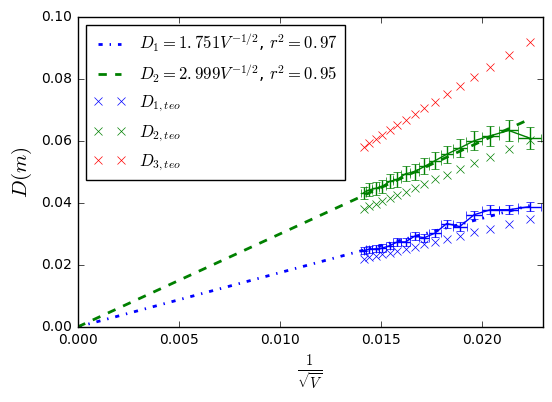

In [17]:
d3_teo=80.5e-12
D1_teo=2*13.5e-2*lambdas_deBroglie/d1_teo
D2_teo=2*13.5e-2*lambdas_deBroglie/d2_teo
D3_teo=2*13.5e-2*lambdas_deBroglie/d3_teo
plt.plot(x, func(x, *popt), label='$D_1=%.3f V^{-1/2}$, $r^2=%.2f$'%(popt[0],corr_d1),ls='-.', lw=2, c='b')
plt.plot(x, func(x, *popt2), label='$D_2=%.3f V^{-1/2}$, $r^2=%.2f$'%(popt2[0], corr_d2), ls='--', lw=2, c='g')
plt.plot(1./(np.sqrt(Volt)), D1_teo, 'x', label='$D_{1,teo}$')
plt.plot(1./(np.sqrt(Volt)), D2_teo, 'x', label='$D_{2,teo}$')
plt.plot(1./(np.sqrt(Volt)), D3_teo, 'x', label='$D_{3,teo}$')
plt.xlim(0, 0.023)
print d1_teo, d2_teo, d3_teo


plt.errorbar(1./np.sqrt(Volt), D1*1e-2, xerr=D2_x_errors, yerr = D1_errors, marker='+', color='b')
plt.errorbar(1./np.sqrt(Volt), D2*1e-2,xerr=D2_x_errors, yerr = D2_errors, marker='+', color='g')
plt.legend(loc=0)
plt.xlabel('$\\frac{1}{\sqrt{V}}$', fontsize=15)
plt.ylabel('$D(m)$', fontsize=15)
plt.savefig('theo_ds.png', dpi=300)

In [13]:
print '$d_i(pm)$ & $d_i^{teo}(pm)$ & \%err \\\\\\hline'
print '%.4f $\pm$ %.4f & %.1f & %.2f\\\\'%(d1*1e12, d1*1e12*perr[0]/popt[0], d1_teo*1e12, 100*abs(d1_teo-d1)/d1_teo)
print '%.4f $\pm$ %.4f & %.1f & %.2f\\\\'%(d2*1e12, d2*1e12*perr2[0]/popt2[0], d2_teo*1e12, 100*abs(d2_teo-d2)/d2_teo)

$d_i(pm)$ & $d_i^{teo}(pm)$ & \%err \\\hline
189.1161 $\pm$ 1.5674 & 213.0 & 11.21\\
110.4259 $\pm$ 0.9101 & 123.0 & 10.22\\
